In [1]:
%matplotlib inline

from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
figsize(11,9)

import scipy.stats as stats

Bayes Theorem - First Part 

What is Bayes Theorem? 
Bayes theorem is what allows us to go from a sampling (or likelihood) distribution and a prior distribution to a posterior distribution.

WHAT IS A SAMPLING DISTRIBUTION?

A sampling distribution is the probability of seeing our data (X) given our parameters (θ). This is written as 
p(X|θ) 



FIRST EXAMPLE: We might have data on 1000 coin flips. Where 1 indicates a head. This can be represented as: 


In [2]:
import numpy as np 
data_coin_flips=np.random.randint(2,size=1000)
np.mean(data_coin_flips)

0.509

This is nice, but what we really want to know is the probability of see all 1,000 of our data points. How do we do that? The trick here is to assume that our data are independent and identically distributed. This assumption allows us to say the probability of seeing all of our data is just the product of each individual probability: $p(x1,…,xn|β)=p(x1|β)∗…∗p(xn|β).$ This is easy to do:

In [8]:
import scipy.stats as st
print(st.bernoulli.pmf(1, .5))
print(st.bernoulli.pmf(0, .5))

np.product(st.bernoulli.pmf(data_coin_flips, .5))

0.5
0.5


9.332636185032189e-302

How does that number help us? Well by itself, it doesn’t really help too much. What we need to do now is get more of a distribution for our sampling model. Currently, we have only tested our model with p = .5, but what if p = .8? or .2? What would the probablility of our data look like then? This can be done by defining a grid of values for our p. Below I will make a grid of 100 values between 0 and 1 (because p has to be between 0 and 1) and then I will calculate the probability of seeing our data given each of these values:

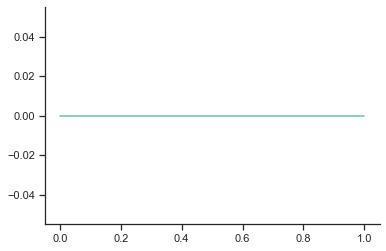

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='ticks', palette='Set2')
 
params = np.linspace(0, 1, 100)
p_x = [np.product(st.bernoulli.pmf(data_coin_flips, p)) for p in params]
plt.plot(params, p_x)
sns.despine()

PRIOR DISTRIBUTION

Bayes theorem says that we need to think about both our sampling distribution and our prior distribution. What do I mean by prior distribution? It is the $p(θ)$ or the probability of seeing a specific value for our parameter. In our sampling distribution we defined 100 values from 0 to 1 for our parameter p. Now we must define the prior probability of seeing each of those values. That is the probability we would have assumed before seeing any data. Most likely, we would have assumed a fair coin, which looks like the distribution above. Lets see how we can do this:

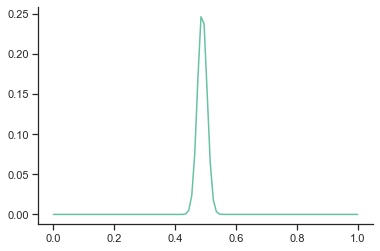

In [12]:
fair_flips = bernoulli_flips = np.random.binomial(n=1, p=.5, size=1000)
p_fair = np.array([np.product(st.bernoulli.pmf(fair_flips, p)) for p in params])
p_fair = p_fair / np.sum(p_fair)
plt.plot(params, p_fair)
sns.despine()

Basically we created 1,000 fair coin flips and then generated the sampling distribution like we did before (except we divided by the sum of the sampling distribution to make the values sum to 1). Now we have a “fair coin” prior on our parameters. This basically means that before we saw any data we thought coin flips were fair. And we can see that assumption in our prior distribution by the fact that our prior distribution peaks at .5 and is almost all between .4 and .6.

Lets keep our fair prior but change our data to be an unfair coin:

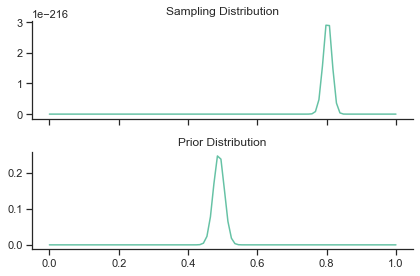

In [14]:
unfair_flips = bernoulli_flips = np.random.binomial(n=1, p=.8, size=1000)
p_unfair = np.array([np.product(st.bernoulli.pmf(unfair_flips, p)) for p in params])
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(params, p_unfair)
axes[0].set_title("Sampling Distribution")
axes[1].plot(params, p_fair)
axes[1].set_title("Prior Distribution")
sns.despine()
plt.tight_layout()

BAYES THEOREM (POSTERIOR DISTRIBUTION)

Bayes theorem is what allows us to go from our sampling and prior distributions to our posterior distribution. The posterior distribution is the $P(θ|X)$. Or in English, the probability of our parameters given our data. And if you think about it that is what we really want. We are typically given our data – from maybe a survey or web traffic – and we want to figure out what parameters are most likely given our data. So how do we get to this posterior distribution? Here comes some math (don’t worry it is not too bad):

By definition, we know that (If you don’t believe me, check out this page for a refresher):

$P(A|B) = \dfrac{P(A,B)}{P(B)}$ Or in English, the probability of seeing A given B is the probability of seeing them both divided by the probability of B.
$P(B|A) = \dfrac{P(A,B)}{P(A)}$ Or in English, the probability of seeing B given A is the probability of seeing them both divided by the probability of A.
You will notice that both of these values share the same numerator, so:

$P(A,B) = P(A|B)*P(B)$
$P(A,B) = P(A|B)*P(B)$

Thus:

$P(A|B)*P(B) = P(B|A)*P(A)$

Which implies:

$P(A|B) = \dfrac{P(B|A)*P(A)}{P(B)}$

And plug in $θ$ for $A$ and $X$ for $B$:

$P(\theta|X) = \dfrac{P(X|\theta)*P(\theta)}{P(X)}$

Nice! Now we can plug in some terminology we know:

$Posterior = \dfrac{likelihood * prior}{P(X)}$

But what is the $P(X)?$ Or in English, the probability of our data? That sounds weird… Let’s go back to some math and use B and A again:

We know that $P(B)=∑AP(A,B)$ (check out this page for a refresher)

And from our definitions above, we know that:

$P(A,B) = P(A|B)*P(A)$

Thus:

$P(B) = \sum_{A} P(A|B)*P(A)$

Plug in our $θ$ and $X$:

$P(X) = \sum_{\theta} P(\theta|X)*P(\theta)$

Plug in our terminology:

$P(X) = \sum_{\theta} likelihood * prior$

Wow! Isn’t that awesome! But what do we mean by $∑θ$. This means to sum over all the values of our parameters. In our coin flip example, we defined 100 values for our parameter p, so we would have to calculated the likelihood * prior for each of these values and sum all those anwers. That is our denominator for Bayes Theorem. Thus our final answer for Bayes is:

$Posterior = \dfrac{likelihood * prior}{\sum_{\theta} likelihood * prior}$

That was a lot of text. Let’s do some more coding and put everything together.

In [16]:
def bern_post(n_params=100, n_sample=100, true_p=.8, prior_p=.5, n_prior=100):
    params = np.linspace(0, 1, n_params)
    sample = np.random.binomial(n=1, p=true_p, size=n_sample)
    likelihood = np.array([np.product(st.bernoulli.pmf(sample, p)) for p in params])
    #likelihood = likelihood / np.sum(likelihood)
    prior_sample = np.random.binomial(n=1, p=prior_p, size=n_prior)
    prior = np.array([np.product(st.bernoulli.pmf(prior_sample, p)) for p in params])
    prior = prior / np.sum(prior)
    posterior = [prior[i] * likelihood[i] for i in range(prior.shape[0])]
    posterior = posterior / np.sum(posterior)
     
    fig, axes = plt.subplots(3, 1, sharex=True, figsize=(8,8))
    axes[0].plot(params, likelihood)
    axes[0].set_title("Sampling Distribution")
    axes[1].plot(params, prior)
    axes[1].set_title("Prior Distribution")
    axes[2].plot(params, posterior)
    axes[2].set_title("Posterior Distribution")
    sns.despine()
    plt.tight_layout()
     
    return posterior

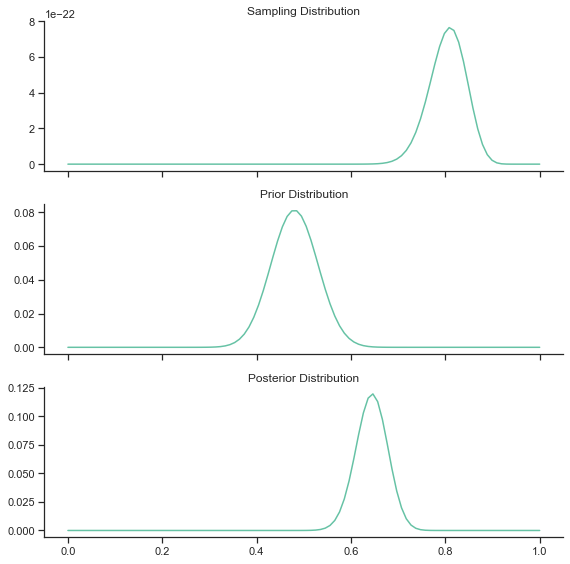

In [17]:
example_post=bern_post()

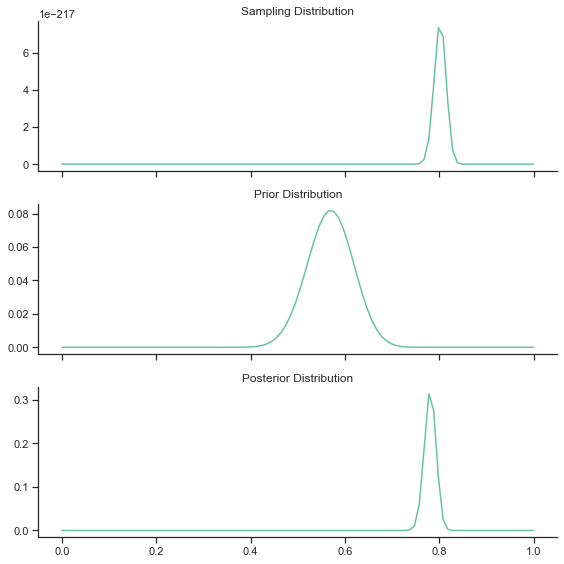

In [18]:
moredata_post = bern_post(n_sample=1000)

# Bayes Method

**"When the facts change, I change my mind. What do you do, sir?"** <sub>John Maynard Keynes</sub>

In the exercise bellow, use you knowledge in bayes method to flip coins.
Suppose you dont know the probability of heads in a coin flip.

We flip the first coin and write the result in a sheet of paper. Later we flip again, but this time 2 coins. We write it down again (after all, we have spare time to do this kind of stuff). In the process of flipping joyfully in many trials, we update our posteriori inbetween them.

How we do that?

Have fun.

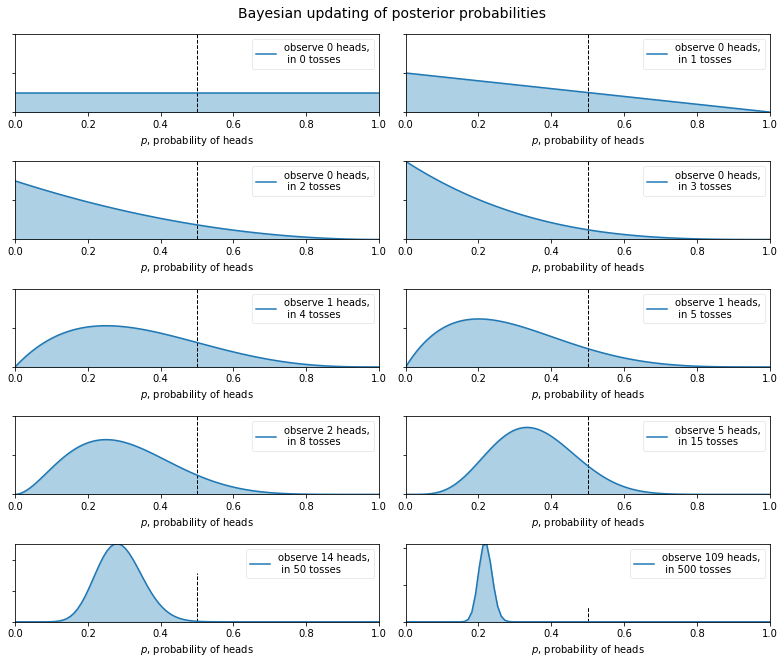

In [57]:
coin_bias=0.23

priori = stats.beta

n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]
data = stats.bernoulli.rvs(coin_bias, size=n_trials[-1]) # Results of the n trials
x = np.linspace(0, 1, 100)



for k, N in enumerate(n_trials):
    
    sx = plt.subplot(len(n_trials)/2, 2, k+1)
    plt.xlabel("$p$, probability of heads") 
    plt.setp(sx.get_yticklabels(), visible=False)
    
    
    heads = data[:N].sum() # Number of heads
    y = priori.pdf(x, 1 + heads, 1 + N - heads)
    plt.plot(x, y, label="observe %d heads,\n in %d tosses" % (heads, N))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)


plt.suptitle("Bayesian updating of posterior probabilities",
             y=1.02,
             fontsize=14)

plt.tight_layout()

In [41]:
def plot_dist(trial,data,x,arg1,arg2):
    
    pdf=stats.beta.pdf(x,arg1,arg2)
   
    
    sx=plt.plot()
    plt.xlabel('$p$ probability of heads')
    #plt.setp(sx.get_yticklabels(),visible=True)
    
    heads=data[:trial].sum()
    
    plt.plot(x,pdf,label='of %d tosses,\n%d heads were observed' % (trial,heads))
    plt.fill_between(x,0,pdf,color='#348ABD',alpha=0.4)
    plt.vlines(0.5,0,pdf.max()+1,color='r',linestyles='--',lw=1)
    leg=plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)
    plt.suptitle('Bayesian updating of posterior probabilities', y=1.02, fontsize=14)

    plt.tight_layout()

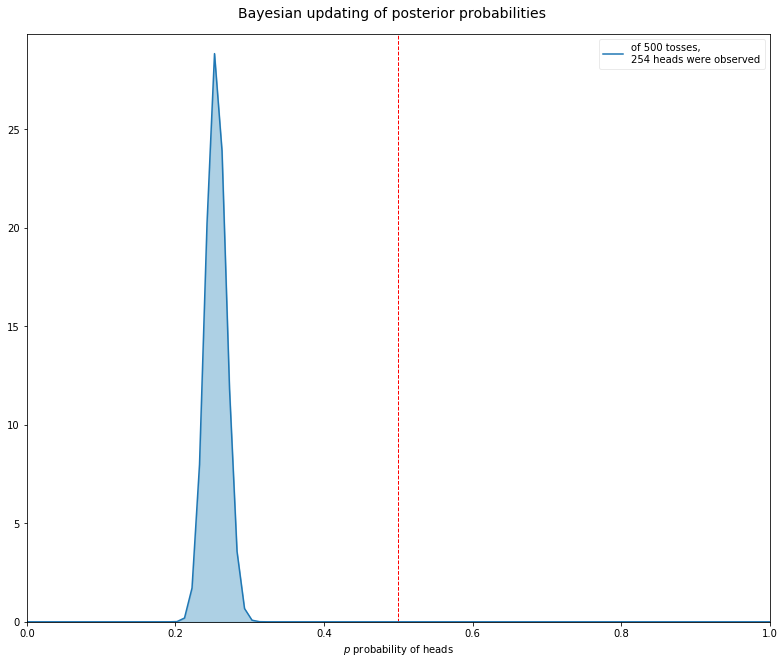

In [49]:
plot_dist(500,data,x,255,747)

In [47]:
heads

254

Here we'll create a fictitious world in which we're a doctor testing patients for HIV, subject to the following assumptions:

P(HIV) = The odds of a person having HIV is .015 or 1.5%

P(Positive) = The probability the test results are positive

P(Negative) = The probability the test results are negative.

P(Positive | HIV) = The probability the test results are positive given someone has HIV. This is also called Sensitivity or True Positive Rate. We'll assume the test is correct .95 or 95% of the time.

P(Negative | ~HIV) = The probability the test results are negative given someone does not have HIV. This is also called Specificity or True Negative Rate. We'll assume this is also correct .95 or 95% of the time.
P(HIV | Positive) = ((P(HIV) * P(Positive | HIV)) / P(Positive)

Thus the probability of getting a positive HIV test result P(HIV) becomes:

P(Positive) = [P(HIV) * Sensitivity] + [P(~HIV) * (1-Specificity)]

Calculations - Priors

In [22]:
#Calcule aqui a probabilidade a priori (probabilidade de se obter um teste positivo) 

p_hiv = .015 #P(HIV) assuming 1.5% of the population has HIV

p_no_hiv = .98 # P(~HIV)

p_positive_hiv = .95 #sensitivity

p_negative_hiv = .95#specificity

#P(Positive)
p_positive = (p_hiv * p_positive_hiv) + (p_no_hiv * (1-p_negative_hiv))
print("The probability of getting a positive test result is:", p_positive, "this is our prior")

The probability of getting a positive test result is: 0.06325000000000004 this is our prior


Using this prior we can calculate our posterior probabilities as follows:

The probability of an individual having HIV given their test result is positive.

P(HIV|Positive) = (P(HIV) * Sensitivity)) / P(Positive)

The probability of an individual not having HIV given their test result is positive.

P(~HIV|Positive) = (P(~HIV) * (1-Sensitivity))) / P(Positive)

Calculations - Posteriors 

In [23]:
#Calcule aqui a probabilidade a posteriori (probabilidade de uma pessoa ter HIV dado que o teste foi positivo)
#P(HIV | Positive)
p_hiv_positive = (p_hiv * p_positive_hiv) / p_positive

print("The probability of a person having HIV, given a positive test result is:", p_hiv_positive)

The probability of a person having HIV, given a positive test result is: 0.22529644268774687


In [24]:
#Calcule aqui a probabilidade a posteriori (proabilidade de uma pessoa não ter HIV dado que o teste foi positivo)
#P(~HIV | Positive)
p_positive_no_hiv = 1 - p_positive_hiv
p_no_hiv_positive = (p_no_hiv * p_positive_no_hiv) / p_positive

print("The probability of an individual not having HIV a positive test result is:", p_no_hiv_positive) 

The probability of an individual not having HIV a positive test result is: 0.7747035573122532


Conclusion
That's it! We've just demonstrated how to calculate Bayes' theorem from scratch. In our illustrative example we showed that if an individual gets a positive test result the probability this individual has HIV is 22.5% and 77.5% that they do not have HIV. We can check the validity of our results by summing the probability of both cases:

In [25]:
posterior_sum = p_no_hiv_positive + p_hiv_positive
posterior_sum #sum to 1, looks good!

1.0